In [78]:
# Retrieving Data
import requests
from pprint import pprint
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data_dict = requests.get('https://think.cs.vt.edu/corgis/datasets/json/graduates/graduates.json').json()
pprint(data_dict[0])

{'Demographics': {'Ethnicity': {'Asians': 84495,
                                'Minorities': 115016,
                                'Whites': 1094775},
                  'Gender': {'Females': 551695, 'Males': 743903},
                  'Total': 1295598},
 'Education': {'Degrees': {'Bachelors': 671374,
                           'Doctorates': 90543,
                           'Masters': 248813,
                           'Professionals': 284869},
               'Major': 'Biological Sciences'},
 'Employment': {'Employer Type': {'Business/Industry': 669270,
                                  'Educational Institution': 300468,
                                  'Government': 121117},
                'Reason Working Outside Field': {'Career Change': 98112,
                                                 'Family-related': 65619,
                                                 'Job Location': 90842,
                                                 'No Job Available': 76598,
               

In [79]:
# Data Cleaning and Preprocessing
data = pd.json_normalize(data_dict)
data.head()

,Year,Demographics.Total,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,Education.Degrees.Bachelors,Education.Degrees.Doctorates,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,84495,115016,1094775,551695,743903,Biological Sciences,671374,90543,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,27531,11278,173067,32205,179670,Chemical Engineering,125883,17024,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,49984,35181,421911,135802,371814,Chemistry,243247,83078,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,37295,17421,281442,21022,315344,Civil Engineering,235237,9884,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,83826,98047,887476,386111,684000,Computer Science and Math,746586,46308,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 50 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           517 non-null    int64  
 1   Demographics.Total                                             517 non-null    int64  
 2   Demographics.Ethnicity.Asians                                  517 non-null    int64  
 3   Demographics.Ethnicity.Minorities                              517 non-null    int64  
 4   Demographics.Ethnicity.Whites                                  517 non-null    int64  
 5   Demographics.Gender.Females                                    517 non-null    int64  
 6   Demographics.Gender.Males                                      517 non-null    int64  
 7   Education.Major                                               

In [81]:
data['Demographics.Total'].describe()

count    5.170000e+02
mean     2.089547e+05
std      4.624167e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.066600e+04
75%      1.680520e+05
max      3.355678e+06
Name: Demographics.Total, dtype: float64

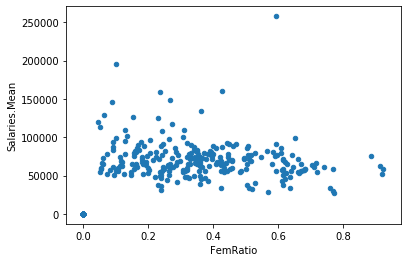

In [82]:
%matplotlib inline
data['FemRatio'] = data['Demographics.Gender.Females'] / data['Demographics.Total']
data = data.fillna(0)
data.plot.scatter(x='FemRatio',y='Salaries.Mean')

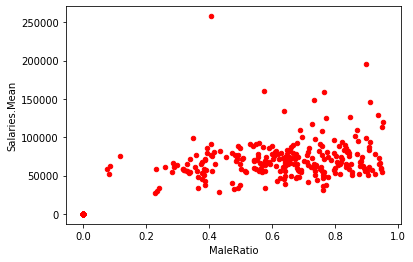

In [110]:
%matplotlib inline
data['MaleRatio'] = data['Demographics.Gender.Males'] / data['Demographics.Total']
data = data.fillna(0)
# plt.scatter(x='MaleRatio',y='Salaries.Mean', color='red', data=data, )
data.plot.scatter(x='MaleRatio',y='Salaries.Mean', color='red')

# Unsupervised learning: kmeans clustering

In [83]:
# Analyzing Data 1
from sklearn.cluster import KMeans

data_numerical = data.select_dtypes('number')
model = KMeans(n_clusters=4, random_state=0)
model.fit(data_numerical[['FemRatio', 'Salaries.Mean']])
data['Labels']= model.labels_
data['Labels'] = data['Labels'].astype('category')

In [84]:
centers = model.cluster_centers_
centers

array([[3.45632043e-01, 8.14698595e+04],
       [3.03711907e-03, 1.08269882e+02],
       [2.33043491e-01, 1.54594753e+05],
       [3.86105104e-01, 5.57058140e+04]])

In [85]:
data.head()

,Year,Demographics.Total,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,Education.Degrees.Bachelors,Education.Degrees.Doctorates,...,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching,FemRatio,Labels
0,1993,1295598,84495,115016,1094775,551695,743903,Biological Sciences,671374,90543,...,365049,539430,99749,103385,506252,269042,215169,381908,0.425823,2
1,1993,211875,27531,11278,173067,32205,179670,Chemical Engineering,125883,17024,...,59299,102248,16361,30480,24690,63895,44780,17718,0.152000,2
2,1993,507616,49984,35181,421911,135802,371814,Chemistry,243247,83078,...,121783,208278,35007,40898,129716,114801,78059,104191,0.267529,2
3,1993,336366,37295,17421,281442,21022,315344,Civil Engineering,235237,9884,...,108338,203035,37940,28639,70727,116758,73133,26892,0.062497,2
4,1993,1070111,83826,98047,887476,386111,684000,Computer Science and Math,746586,46308,...,287405,439446,62482,73411,126083,223467,168404,234507,0.360814,2


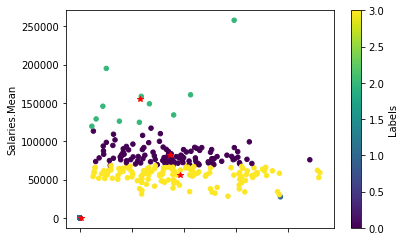

In [86]:
data.plot.scatter(x='FemRatio',y='Salaries.Mean',c='Labels', colormap='viridis')
plt.plot([x[0] for x in centers], [x[1] for x in centers],'r*')

# Supervised Learning: decision tree classifier

In [87]:
majors = ['Mechanical Engineering', 'Computer Science and Math', 'Chemical Engineering',  'Electrical Engineering', 'Civil Engineering', 'Other Engineering']

In [112]:
subset_data = data[data['Education.Major'].isin(majors)].copy()
subset_data['Education.Major'].value_counts()

Mechanical Engineering       11
Electrical Engineering       11
Computer Science and Math    11
Chemical Engineering         11
Civil Engineering            11
Other Engineering            11
Name: Education.Major, dtype: int64

In [89]:
subset_data['Education.Major'] = subset_data['Education.Major'].astype('category')

In [90]:
train = subset_data.sample(int(len(subset_data)*.8), random_state=13).copy()
indexes_used_in_train = train.index
test = subset_data.loc[~subset_data.index.isin(indexes_used_in_train)].copy()

In [91]:
features = ['FemRatio', 'Salaries.Mean']
target = 'Education.Major'

In [92]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(train[features],train[target])
test['Predicted_Major'] = model.predict(test[features])

In [93]:
test[['Education.Major', 'Predicted_Major']]

,Education.Major,Predicted_Major
4,Computer Science and Math,Computer Science and Math
102,Mechanical Engineering,Electrical Engineering
191,Civil Engineering,Other Engineering
192,Computer Science and Math,Chemical Engineering
261,Mechanical Engineering,Civil Engineering
268,Other Engineering,Electrical Engineering
285,Civil Engineering,Civil Engineering
286,Computer Science and Math,Other Engineering
333,Computer Science and Math,Other Engineering
336,Mechanical Engineering,Other Engineering


# Supervised Learning: linear regression
## Correlation heatmap
A tool used to identify correlated columns for feature selection 

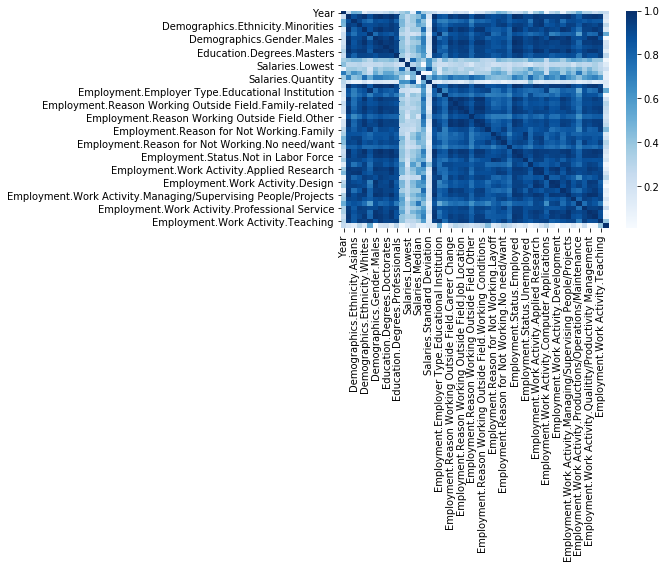

In [94]:
sns.heatmap(subset_data.corr().abs(), cmap='Blues')

In [95]:
subset_data.corr().abs()['Salaries.Mean'].sort_values(ascending=False)

Salaries.Mean                                                    1.000000
Salaries.Standard Deviation                                      0.840951
Salaries.Highest                                                 0.769375
Employment.Work Activity.Accounting/Finance/Contracts            0.577542
Salaries.Median                                                  0.488559
Employment.Work Activity.Productions/Operations/Maintenance      0.479058
Employment.Work Activity.Qualitity/Productivity Management       0.468721
Salaries.Quantity                                                0.456387
Employment.Work Activity.Design                                  0.453507
Employment.Work Activity.Managing/Supervising People/Projects    0.444849
Employment.Work Activity.Applied Research                        0.437117
Demographics.Gender.Males                                        0.431693
Employment.Work Activity.Development                             0.431566
Employment.Reason for Not Working.No J

In [96]:
features = ['Employment.Work Activity.Accounting/Finance/Contracts', 'Employment.Work Activity.Productions/Operations/Maintenance', 'Employment.Work Activity.Qualitity/Productivity Management', 'Employment.Work Activity.Managing/Supervising People/Projects']
target = 'Salaries.Mean'

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train[features], train[target])
predictions = model.predict(test[features])

rmse = mean_squared_error(predictions, test[target])**.5
rmse

15378.439237636701

In [98]:
test['Salaries.Mean'].mean()

71758.25785714286

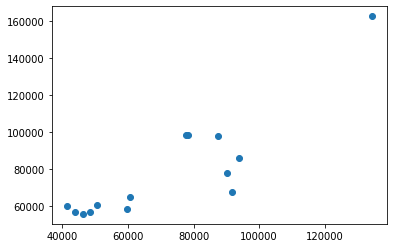

In [99]:
plt.scatter(test['Salaries.Mean'], predictions)

In [100]:
model.coef_

array([ 0.41767616,  0.35375009, -0.1555307 , -0.19949247])

In [101]:
model.intercept_

56831.80189482783